In [4]:
!pip install tensorflow opencv-python mediapipe scikit-learn matplotlib


In [5]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [6]:
pip install mediapipe --upgrade


Note: you may need to restart the kernel to use updated packages.


In [7]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [8]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [9]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [10]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        ) 
    # Draw pose connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        ) 
    # Draw left hand connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        ) 
    # Draw right hand connections  
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        ) 


In [11]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1719556207.840661  761644 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M2
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1719556207.910466  762287 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1719556207.920014  762287 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1719556207.921790  762292 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1719556207.921813  762288 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1719556207.922171  762287 inference_feedback_manager.cc:114] Feedback manager requires a mod

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [12]:
results

mediapipe.python.solution_base.SolutionOutputs

In [13]:
results.face_landmarks


landmark {
  x: 0.529505551
  y: 0.567825437
  z: -0.0220688563
}
landmark {
  x: 0.532106459
  y: 0.522863388
  z: -0.0376002826
}
landmark {
  x: 0.529876709
  y: 0.538835943
  z: -0.0208563637
}
landmark {
  x: 0.52572763
  y: 0.478470534
  z: -0.027765112
}
landmark {
  x: 0.532683671
  y: 0.508357644
  z: -0.0395942479
}
landmark {
  x: 0.532424271
  y: 0.490537822
  z: -0.0363087133
}
landmark {
  x: 0.53083086
  y: 0.449361145
  z: -0.0157624092
}
landmark {
  x: 0.476136804
  y: 0.4474549
  z: 0.00453961361
}
landmark {
  x: 0.530906141
  y: 0.417016864
  z: -0.0101801334
}
landmark {
  x: 0.531592906
  y: 0.397673428
  z: -0.0110680498
}
landmark {
  x: 0.532148182
  y: 0.329881847
  z: -0.00137941632
}
landmark {
  x: 0.529277265
  y: 0.574404418
  z: -0.0212886166
}
landmark {
  x: 0.528767586
  y: 0.579100251
  z: -0.0190240629
}
landmark {
  x: 0.528199792
  y: 0.580545604
  z: -0.0160693135
}
landmark {
  x: 0.528490603
  y: 0.581254244
  z: -0.0164654348
}
landmark {
  x

In [14]:
draw_styled_landmarks(frame, results)

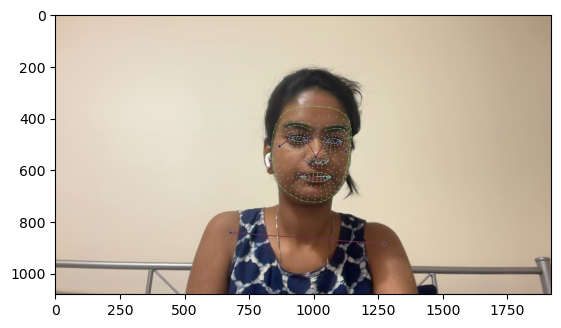

In [15]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# Extract Keypoint Values

In [16]:
print("Face landmarks:", results.face_landmarks)
print("Pose landmarks:", results.pose_landmarks)
print("Left hand landmarks:", results.left_hand_landmarks)
print("Right hand landmarks:", results.right_hand_landmarks)


Face landmarks: landmark {
  x: 0.529505551
  y: 0.567825437
  z: -0.0220688563
}
landmark {
  x: 0.532106459
  y: 0.522863388
  z: -0.0376002826
}
landmark {
  x: 0.529876709
  y: 0.538835943
  z: -0.0208563637
}
landmark {
  x: 0.52572763
  y: 0.478470534
  z: -0.027765112
}
landmark {
  x: 0.532683671
  y: 0.508357644
  z: -0.0395942479
}
landmark {
  x: 0.532424271
  y: 0.490537822
  z: -0.0363087133
}
landmark {
  x: 0.53083086
  y: 0.449361145
  z: -0.0157624092
}
landmark {
  x: 0.476136804
  y: 0.4474549
  z: 0.00453961361
}
landmark {
  x: 0.530906141
  y: 0.417016864
  z: -0.0101801334
}
landmark {
  x: 0.531592906
  y: 0.397673428
  z: -0.0110680498
}
landmark {
  x: 0.532148182
  y: 0.329881847
  z: -0.00137941632
}
landmark {
  x: 0.529277265
  y: 0.574404418
  z: -0.0212886166
}
landmark {
  x: 0.528767586
  y: 0.579100251
  z: -0.0190240629
}
landmark {
  x: 0.528199792
  y: 0.580545604
  z: -0.0160693135
}
landmark {
  x: 0.528490603
  y: 0.581254244
  z: -0.0164654348


In [22]:
len(results.pose_landmarks.landmark)

33

In [23]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [24]:
pose.shape()

AttributeError: 'list' object has no attribute 'shape'

In [25]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(33*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(33*3)

In [26]:
face = np.zeros(1404)
if results.face_landmarks:
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten()


In [27]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [28]:
result_test = extract_keypoints(results)

In [29]:
result_test

array([ 0.5259853 ,  0.51019263, -0.72657406, ...,  0.        ,
        0.        ,  0.        ])

In [30]:
np.save('0', result_test)

In [31]:
np.load('0.npy')

array([ 0.5259853 ,  0.51019263, -0.72657406, ...,  0.        ,
        0.        ,  0.        ])

# CSetup Folders for Collection

In [32]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 10

# Videos are going to be 30 frames in length
sequence_length = 10

In [33]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [34]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# Collect Keypoint Values for Training and Testing

In [35]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1719556299.966512  761644 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M2
W0000 00:00:1719556300.033978  763595 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1719556300.042550  763597 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1719556300.043982  763599 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1719556300.044162  763597 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1719556300.049609  763596 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support 

In [36]:
cap.release()
cv2.destroyAllWindows()

Preprocess Data and Create Labels and Features

In [37]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [38]:
label_map = {label:num for num, label in enumerate(actions)}

In [39]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [40]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [41]:
np.array(sequences).shape

(30, 10, 1662)

In [42]:
np.array(labels).shape

(30,)

In [43]:
X = np.array(sequences)

In [44]:
X.shape

(30, 10, 1662)

In [45]:

y = to_categorical(labels).astype(int)

In [46]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [48]:
y_test.shape

(2, 3)

Build and Train LSTM Neural Network

In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [50]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [94]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [95]:
res = [.7, 0.2, 0.1]

In [96]:
actions[np.argmax(res)]

'hello'

In [97]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [98]:
model.fit(X_train, y_train, epochs=200, callbacks=[tb_callback])

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - categorical_accuracy: 0.3571 - loss: 1.0981
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - categorical_accuracy: 0.4286 - loss: 1.1008
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - categorical_accuracy: 0.3571 - loss: 1.1002
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - categorical_accuracy: 0.3571 - loss: 1.0969
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.3571 - loss: 1.0942
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - categorical_accuracy: 0.6071 - loss: 1.0980
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - categorical_accuracy: 0.3571 - loss: 1.0910
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - categorical_accuracy: 0.3571 - loss: 1.0915
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - categorical_accuracy: 0.3571 - loss: 1.0846
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - categorical_accuracy: 0.3571 - loss: 1.0809
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [99]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

In [100]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step


In [101]:
actions[np.argmax(res[1])]

'iloveyou'

In [102]:
actions[np.argmax(y_test[1])]

'iloveyou'

# Save Weights

In [103]:
# Save the model
model.save('action.h5')


In [104]:
# Delete the model
del model



In [106]:

# Recreate the model architecture
from keras.models import Sequential
from keras.layers import LSTM, Dense

from keras.models import Sequential
from keras.layers import LSTM, Dense, Input

model = Sequential()
model.add(Input(shape=(30, 1662)))
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))
# Load the model weights
model.load_weights('action.h5')

# Import the necessary metrics
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
# Predict using the model
yhat = model.predict(X_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


In [108]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [109]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[1, 0],
        [0, 1]],

       [[1, 0],
        [0, 1]]])

In [110]:
accuracy_score(ytrue, yhat)

1.0

# Test in Real Time

In [118]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [119]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

I0000 00:00:1719556987.780433  761644 gl_context.cc:357] GL version: 2.1 (2.1 Metal - 83.1), renderer: Apple M2
W0000 00:00:1719556987.849065  796678 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1719556987.855726  796677 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1719556987.858992  796683 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1719556987.859189  796677 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1719556987.859689  796681 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support 

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

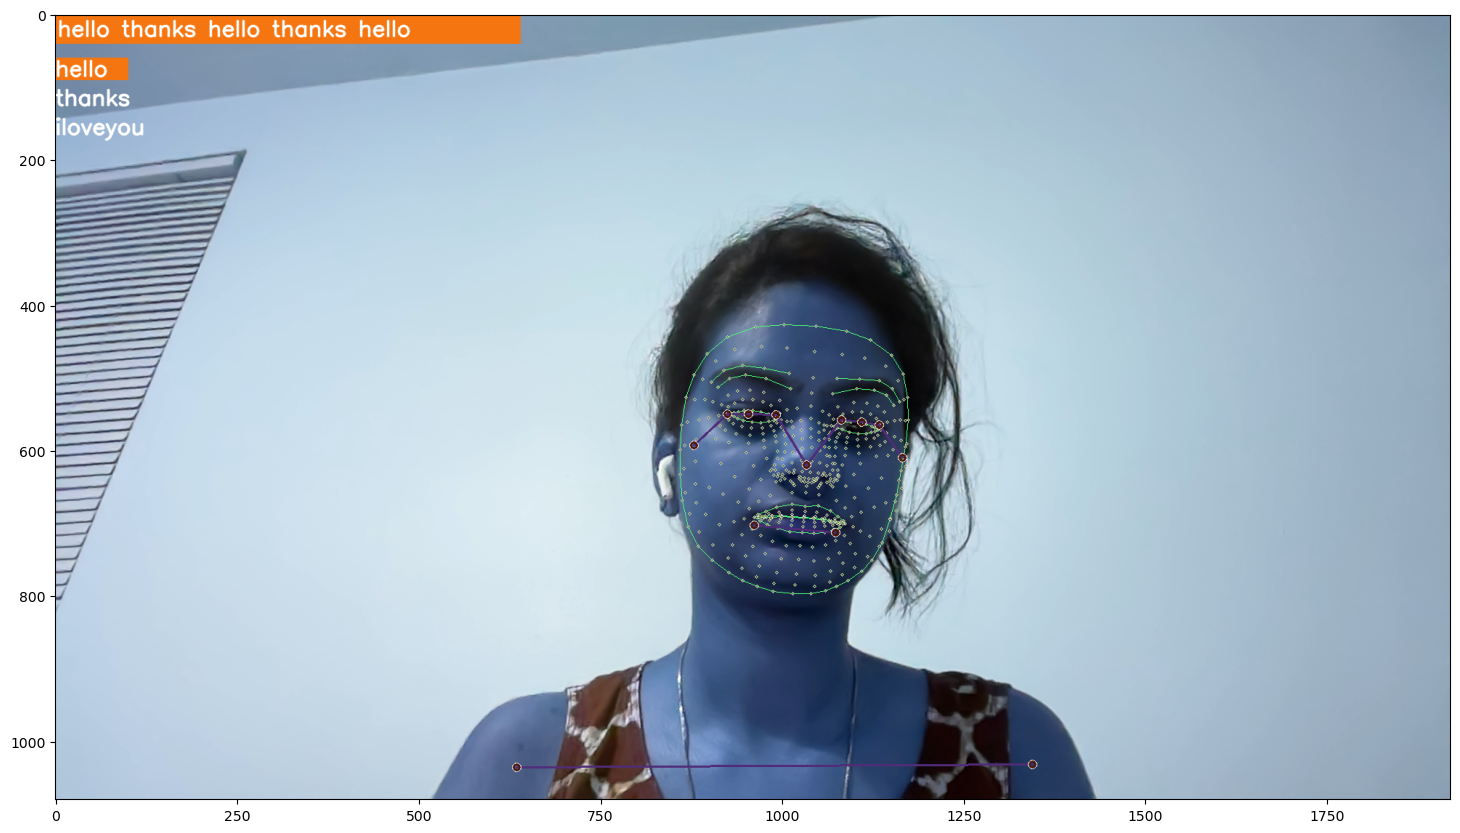

In [120]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [121]:
cap.release()
cv2.destroyAllWindows()

In [122]:
res[np.argmax(res)] > threshold

True

In [123]:
model.predict(np.expand_dims(X_test[0], axis=0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


array([[0.00572141, 0.97740173, 0.01687685]], dtype=float32)